In [1]:
import pandas as pd
import seaborn as sns
Tips = sns.load_dataset('tips')
Tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# correlation matrix
cor=Tips.corr()
cor

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


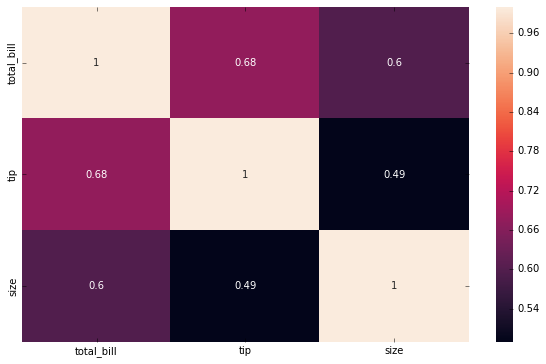

In [3]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
# plotting Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [4]:
Tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
Tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
# Skewness
Tips.skew()

total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

c:\users\victoria\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\victoria\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\victoria\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not lay

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000806F07B3C8>,
      dtype=object)

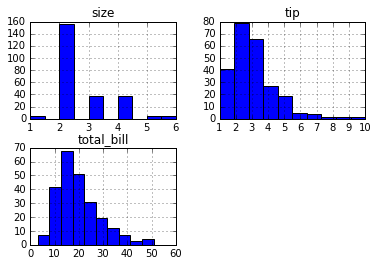

In [7]:
Tips.hist()

In [3]:
X = Tips.iloc[:, [0,1]].values
y =Tips.iloc[:, 6].values

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.62068738 0.37931262]


In [16]:
#Feature Importance  of tips dataset for time
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = Tips.iloc[:, [0,1]].values
y =Tips.iloc[:, 5].values
a=rnd_clf.fit(X, y)
for name, score in zip(Tips[['total_bill','tip']], rnd_clf.feature_importances_):
    print(name, score)

total_bill 0.621379543844299
tip 0.37862045615570095


In [17]:
#Feature Importance  of tips dataset for sex
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = Tips.iloc[:, [0,1]].values
y =Tips.iloc[:, 2].values
a=rnd_clf.fit(X, y)
for name, score in zip(Tips[['total_bill','tip']], rnd_clf.feature_importances_):
    print(name, score)

total_bill 0.6031853089561624
tip 0.39681469104383765


In [13]:
#Feature Importance  of tips dataset for Smoker
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = Tips.iloc[:, [0,1]].values
y =Tips.iloc[:, 3].values
a=rnd_clf.fit(X, y)
for name, score in zip(Tips[['total_bill','tip']], rnd_clf.feature_importances_):
    print(name, score)

total_bill 0.6107687390670608
tip 0.3892312609329392


In [18]:
#Feature Importance  of tips dataset for day
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = Tips.iloc[:, [0,1]].values
y =Tips.iloc[:, 4].values
a=rnd_clf.fit(X, y)
for name, score in zip(Tips[['total_bill','tip']], rnd_clf.feature_importances_):
    print(name, score)

total_bill 0.5884821776610758
tip 0.41151782233892414


In [20]:
X = Tips.iloc[:, [0,1]].values
y =Tips.iloc[:, 6].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [21]:
print(X_train.shape) 
print(X_test.shape) 

(170, 2)
(74, 2)


In [22]:
print(y_train.shape) 
print(y_test.shape) 

(170,)
(74,)


# Regression metrics(RMSE)

In [51]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
pred = linreg.predict(X)
lin_mse = mean_squared_error(y, pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7526000157651817

In [52]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor()
treereg.fit(X, y)
pred1 = treereg.predict(X)
treereg_mse = mean_squared_error(y, pred1)
treereg_rmse = np.sqrt(treereg_mse)
treereg_rmse

0.0

In [53]:
from sklearn.neighbors import KNeighborsRegressor
Knnreg = KNeighborsRegressor()
Knnreg.fit(X, y)
pred_1 = Knnreg.predict(X)
Knnreg_mse = mean_squared_error(y, pred_1)
Knnreg_rmse = np.sqrt(Knnreg_mse)
Knnreg_rmse

0.6568678785235776

In [54]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)
pred3 = svm_poly_reg.predict(X)
SVR_mse = mean_squared_error(y, pred3)
SVR_rmse = np.sqrt(SVR_mse)
SVR_rmse

0.805045885190318

In [55]:
from sklearn import svm
SVRReg = svm.SVR(kernel='linear', gamma='auto')
SVRReg.fit(X, y)
pred4= SVRReg.predict(X)
SVRReg_mse = mean_squared_error(y, pred4)
SVRReg_rmse = np.sqrt(SVRReg_mse)
SVRReg_rmse

0.7808297314903357

In [63]:
from sklearn.ensemble import RandomForestRegressor
Ranfor = RandomForestRegressor()
Ranfor.fit(X,y)
pred5 = Ranfor.predict(X)
Ran_mse = mean_squared_error(y, pred5)
Ran_rmse = np.sqrt(Ran_mse)
Ran_rmse

0.31438203761310934

# Cross validation

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg, X,y, scoring="neg_mean_squared_error", cv=10)
linreg_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(linreg_scores)

Scores: [0.68075533 0.71338044 0.58757795 0.72706058 0.58625199 1.04771488
 0.98646708 1.01995131 0.62753122 0.62740397]
Mean: 0.7604094773343704
Standard deviation: 0.17499306479345894


In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X,y, scoring="neg_mean_squared_error", cv=10)
treereg_scores = np.sqrt(-scores)
display_scores(treereg_scores)

Scores: [1.05830052 0.84852814 1.         1.14891253 1.02062073 1.25830574
 1.         1.17260394 1.25830574 1.        ]
Mean: 1.07655773356964
Standard deviation: 0.1239224742519853


In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Knnreg, X,y, scoring="neg_mean_squared_error", cv=10)
Knnreg_scores = np.sqrt(-scores)
display_scores(Knnreg_scores)

Scores: [0.75259551 0.69742383 0.61188234 0.85790442 0.6544718  0.99163165
 0.95131488 1.05908766 0.72686542 0.68799225]
Mean: 0.7991169755786499
Standard deviation: 0.14741797496245687


In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_reg, X,y, scoring="neg_mean_squared_error", cv=10)
svm_reg_scores = np.sqrt(-scores)
display_scores(svm_reg_scores)

Scores: [2.84253408 2.79284801 2.62297541 2.30651252 2.34520788 3.04822353
 3.16885889 2.75378527 2.98607881 2.38921186]
Mean: 2.7256236264007856
Standard deviation: 0.2883444361739899


c:\users\victoria\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\victoria\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\victoria\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\victoria\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\victoria\appdata\local\programs\python\pyth

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_poly_reg, X,y, scoring="neg_mean_squared_error", cv=10)
svm_poly_reg_scores = np.sqrt(-scores)
display_scores(svm_poly_reg_scores)

Scores: [0.78844962 0.79580598 0.63883516 0.54504764 0.51981695 1.14691844
 1.16202546 1.10227486 0.82750579 0.62066307]
Mean: 0.8147342972871214
Standard deviation: 0.23305805839025673


In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVRReg, X,y, scoring="neg_mean_squared_error", cv=10)
SVRReg_scores = np.sqrt(-scores)
display_scores(SVRReg_scores)

Scores: [0.757111   0.76236665 0.60460061 0.60180485 0.51100556 1.13954427
 1.05308072 1.00614902 0.76880286 0.61250791]
Mean: 0.7816973456553149
Standard deviation: 0.20465825627014758


In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Ranfor, X,y, scoring="neg_mean_squared_error", cv=10)
Ranfor_scores = np.sqrt(-scores)
display_scores(Ranfor_scores)

Scores: [0.76955572 0.73047656 0.83585405 0.81662231 0.70241251 0.99607772
 0.91648786 1.1055617  0.90438976 0.81710872]
Mean: 0.8594546912676678
Standard deviation: 0.11750347650742492


In [35]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)
lin_mse = mean_squared_error(y_test,pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7841523049838994

In [56]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor()
treereg.fit(X_train, y_train)
pred1 = treereg.predict(X_test)
treereg_mse = mean_squared_error(y_test, pred1)
treereg_rmse = np.sqrt(treereg_mse)
treereg_rmse

1.2734290799340267

In [57]:
from sklearn.neighbors import KNeighborsRegressor
Knnreg = KNeighborsRegressor()
Knnreg.fit(X_train, y_train)
pred_1 = Knnreg.predict(X_test)
Knnreg_mse = mean_squared_error(y_test, pred_1)
Knnreg_rmse = np.sqrt(Knnreg_mse)
Knnreg_rmse

0.8614883412804623

In [58]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)
pred3 = svm_poly_reg.predict(X_test)
svm_poly_reg_mse = mean_squared_error(y_test, pred3)
svm_poly_reg_rmse = np.sqrt(svm_poly_reg_mse)
svm_poly_reg_rmse

0.9329228606332076

In [59]:
from sklearn import svm
SVRReg = svm.SVR(kernel='linear', gamma='auto')
SVRReg.fit(X_train, y_train)
pred4= SVRReg.predict(X_test)
SVRReg_mse = mean_squared_error(y_test, pred4)
SVRReg_rmse = np.sqrt(SVRReg_mse)
SVRReg_rmse

0.7726141075591904

In [64]:
from sklearn.ensemble import RandomForestRegressor
Ranfor = RandomForestRegressor()
Ranfor.fit(X_train, y_train)
pred5 = Ranfor.predict(X_test)
Ran_mse = mean_squared_error(y_test, pred5)
Ran_rmse = np.sqrt(Ran_mse)
Ran_rmse

0.931961024588127

# Working with the best Model

In [18]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
y_pred

array([2.64287396, 2.20812642, 2.37334796, 2.28438892, 2.01703039,
       3.30060425, 2.44733953, 2.03795837, 2.30341303, 2.47726194,
       2.50925923, 3.16640572, 2.01503175, 2.15894193, 2.49712089,
       2.47053627, 2.2886585 , 2.46384437, 1.857997  , 3.09666847,
       2.24030014, 1.81841197, 1.51823655, 3.48790068, 2.58772895,
       2.94631036, 3.2620926 , 2.25602458, 2.9543485 , 1.7720528 ,
       2.34102447, 2.04301433, 1.99681527, 2.18140891, 3.01529064,
       3.33172693, 2.3085572 , 4.10048897, 3.53084692, 2.86027632,
       1.99742249, 3.53696754, 2.02796844, 2.15894193, 2.63919907,
       2.34119928, 2.02895143, 3.03736172, 2.98677709, 2.06057295,
       2.10728228, 2.51789911, 2.69165545, 3.04356676, 3.01782297,
       2.61759634, 2.70193183, 2.43795955, 3.3480771 , 2.11678262,
       2.16859421, 3.35136151, 3.06090154, 2.0544545 , 2.18990994,
       2.54354541, 1.97944019, 4.17989539, 2.53619129, 1.93168306,
       2.84460034, 3.11761769, 2.11400795, 1.85771654])

In [66]:
from sklearn.neighbors import KNeighborsRegressor
Knnreg = KNeighborsRegressor()
Knnreg.fit(X_train, y_train)
pred_1 = Knnreg.predict(X_test)
pred_1

array([3.8, 2.2, 2. , 2. , 2.8, 2.8, 5. , 2. , 2. , 2. , 1.8, 2.6, 3.2,
       2.4, 1.8, 2. , 2.4, 2. , 2. , 2. , 4.2, 2.2, 2.8, 2.6, 2.4, 2.4,
       2. , 2. , 2.2, 2.2, 3.4, 4.2, 2. , 3.2, 3.6, 2.4, 2.6, 4.2, 4.2,
       2.6, 2.8, 2.4, 3.4, 2.2, 1.8, 2. , 1.8, 2. , 2.2, 3.8, 2. , 2.4,
       3.4, 2.2, 2.4, 2. , 2. , 2. , 2.4, 4.6, 2. , 3. , 2.6, 1.8, 2.4,
       2.8, 2.8, 3.4, 4. , 3.4, 2. , 2.8, 3.4, 2.6])

In [23]:
from sklearn import svm
SVRReg = svm.SVR(kernel='linear', gamma='auto')
SVRReg.fit(X_train, y_train)
pred4= SVRReg.predict(X_test)

array([4., 2., 3., 2., 2., 4., 2., 2., 2., 2., 3., 5., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 3., 2.,
       4., 5., 2., 5., 2., 2., 3., 2., 2., 2., 4., 2., 2., 4., 4., 2., 2.,
       2., 3., 4., 4., 2., 2., 3., 2., 2., 2., 3., 4., 2., 2., 4., 2., 3.,
       2., 2., 4., 4., 2., 2.])

In [48]:
list(Tips.keys())

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

# Grid Search

In [126]:
# KNN Rs
from sklearn.neighbors import KNeighborsRegressor
knnReg = KNeighborsRegressor()
param_dist = {'n_neighbors': list(range(1,30,1))}
from sklearn.model_selection import GridSearchCV
Gs = GridSearchCV(knnReg,param_dist,cv=10,scoring='neg_mean_squared_error')
Gs.fit(X_train, y_train)
Gs.best_params_

{'n_neighbors': 18}

In [128]:
Gs.best_estimator_

KNeighborsRegressor(n_neighbors=18)

In [129]:
cvres = Gs.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.0873605387250682 {'n_neighbors': 1}
0.8977095036486895 {'n_neighbors': 2}
0.8343131494664033 {'n_neighbors': 3}
0.8080477563056457 {'n_neighbors': 4}
0.7844068572157301 {'n_neighbors': 5}
0.7782794833787962 {'n_neighbors': 6}
0.7757581583767683 {'n_neighbors': 7}
0.7759600315662111 {'n_neighbors': 8}
0.7722022379508467 {'n_neighbors': 9}
0.7638139594861318 {'n_neighbors': 10}
0.7602164315830124 {'n_neighbors': 11}
0.7607078746721604 {'n_neighbors': 12}
0.7527649463096837 {'n_neighbors': 13}
0.7498299126863264 {'n_neighbors': 14}
0.7471951910945167 {'n_neighbors': 15}
0.7428272204300033 {'n_neighbors': 16}
0.73697385990356 {'n_neighbors': 17}
0.7355482494750002 {'n_neighbors': 18}
0.7385539601774924 {'n_neighbors': 19}
0.7398728030586625 {'n_neighbors': 20}
0.7410935756536755 {'n_neighbors': 21}
0.7406195096963937 {'n_neighbors': 22}
0.7366892136053407 {'n_neighbors': 23}
0.7384527743870964 {'n_neighbors': 24}
0.7414199413367332 {'n_neighbors': 25}
0.7452950228436593 {'n_neighbors': 2

In [131]:
# ls Rs
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
param_dist = {'n_jobs': list(range(1,40,1))}
from sklearn.model_selection import GridSearchCV
Gs = GridSearchCV(linreg,param_dist,cv=10,scoring='neg_mean_squared_error')
Gs.fit(X_train, y_train)
Gs.best_params_

{'n_jobs': 1}

In [134]:
Gs.best_estimator_

LinearRegression(n_jobs=1)

In [99]:
cvres = Gs.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.7603544971833752 {'n_jobs': 24}
0.7603544971833752 {'n_jobs': 22}
0.7603544971833752 {'n_jobs': 6}
0.7603544971833752 {'n_jobs': 38}
0.7603544971833752 {'n_jobs': 35}
0.7603544971833752 {'n_jobs': 2}
0.7603544971833752 {'n_jobs': 17}
0.7603544971833752 {'n_jobs': 21}
0.7603544971833752 {'n_jobs': 18}
0.7603544971833752 {'n_jobs': 16}
0.7603544971833752 {'n_jobs': 19}
0.7603544971833752 {'n_jobs': 37}
0.7603544971833752 {'n_jobs': 26}
0.7603544971833752 {'n_jobs': 23}
0.7603544971833752 {'n_jobs': 36}
0.7603544971833752 {'n_jobs': 15}
0.7603544971833752 {'n_jobs': 32}
0.7603544971833752 {'n_jobs': 30}
0.7603544971833752 {'n_jobs': 20}
0.7603544971833752 {'n_jobs': 10}
0.7603544971833752 {'n_jobs': 7}
0.7603544971833752 {'n_jobs': 13}
0.7603544971833752 {'n_jobs': 8}
0.7603544971833752 {'n_jobs': 14}
0.7603544971833752 {'n_jobs': 39}
0.7603544971833752 {'n_jobs': 11}
0.7603544971833752 {'n_jobs': 28}
0.7603544971833752 {'n_jobs': 25}
0.7603544971833752 {'n_jobs': 27}


# Evaluation on the Test Set

In [133]:
from sklearn.neighbors import KNeighborsRegressor
Knnreg = KNeighborsRegressor(n_neighbors= 18)
Knnreg.fit(X_train, y_train)
pred_1 = Knnreg.predict(X_test)
Knnreg_mse = mean_squared_error(y_test, pred_1)
Knnreg_rmse = np.sqrt(Knnreg_mse)
Knnreg_rmse

0.8017800100512927

In [135]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression(n_jobs=1)
linreg.fit(X_train, y_train)
pred2 = linreg.predict(X_test)
linreg_mse = mean_squared_error(y_test, pred2)
linreg_rmse = np.sqrt(Knnreg_mse)
Knnreg_rmse

0.8017800100512927